<a href="https://colab.research.google.com/github/Sabry-Ahmed/Python_M1/blob/main/Projet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from google.colab import drive
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/M1/international_matches.csv')
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/M1/international_matches.csv')
df.tail()


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [74]:
df = df.replace(np.nan, 0)
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,0.0,75.2,75.0,77.5,70.8,72.3,74.0


In [139]:
#Filter the teams participating in World cup 22
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
WordcupTeams = rank[(rank["team"].apply(lambda x: x in list_2022))][0:32]
WordcupTeams.index += 1

print(WordcupTeams)

WordcupTop5 = WordcupTeams[(WordcupTeams["team"].apply(lambda x: x in list_2022))][0:5]
WordcupTop5




              team        date  rank
1           Brazil  2022-06-06     1
2          Belgium  2022-06-14     2
3           France  2022-06-13     3
4        Argentina  2022-06-05     4
5          England  2022-06-14     5
7            Spain  2022-06-12     7
8         Portugal  2022-06-12     8
9           Mexico  2022-06-14     9
10     Netherlands  2022-06-14    10
11         Denmark  2022-06-13    11
12         Germany  2022-06-14    12
13         Uruguay  2022-06-11    13
14     Switzerland  2022-06-12    14
15             USA  2022-06-14    15
16         Croatia  2022-06-13    16
18           Wales  2022-06-14    18
20         Senegal  2022-06-07    20
21         IR Iran  2022-06-12    21
23           Japan  2022-06-14    23
24         Morocco  2022-06-13    24
25          Serbia  2022-06-12    25
26          Poland  2022-06-14    26
29  Korea Republic  2022-06-14    29
31      Costa Rica  2022-06-14    31
36         Tunisia  2022-06-14    35
37        Cameroon  2022-06-09    37
3

,team,date,rank
1,Brazil,2022-06-06,1
2,Belgium,2022-06-14,2
3,France,2022-06-13,3
4,Argentina,2022-06-05,4
5,England,2022-06-14,5


Les 32 équipes de la Coupe du monde de 2022


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

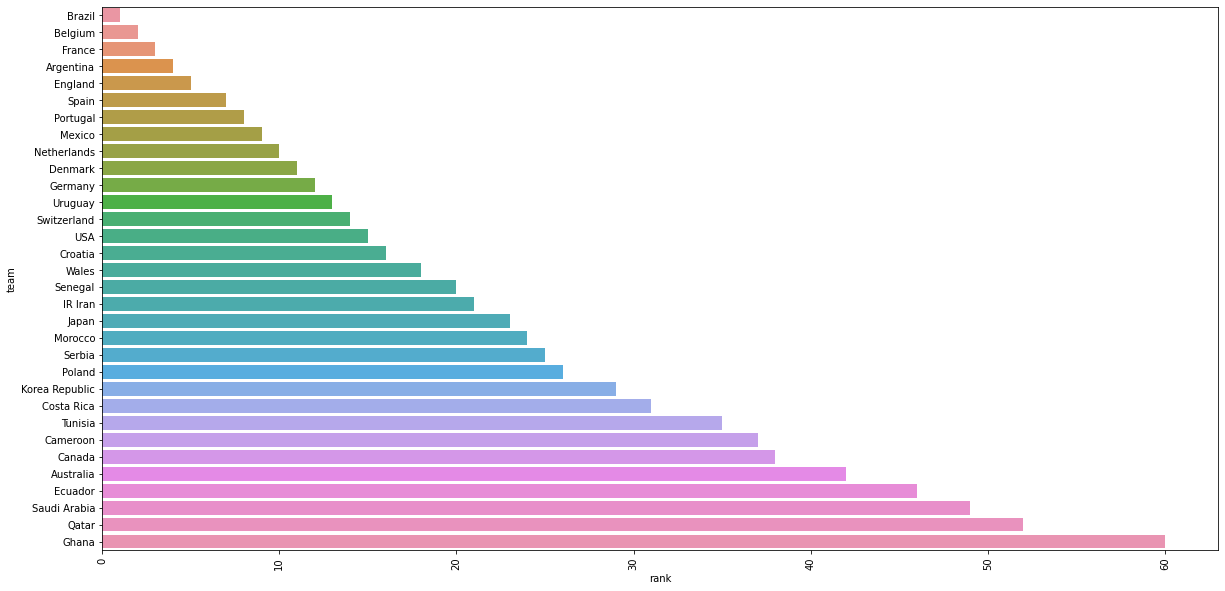

In [135]:
f, ax = plt.subplots(figsize = (20,10))
sns.barplot(data=WordcupTeams, x='rank', y = 'team')
plt.xticks(rotation=90)

Les 5 meilleures équipes

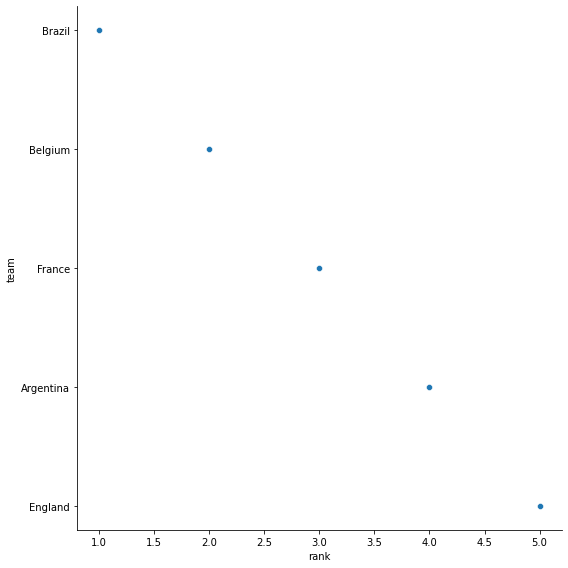

In [107]:

sb.relplot(x="rank", y="team", data=WordcupTop5, height=8)

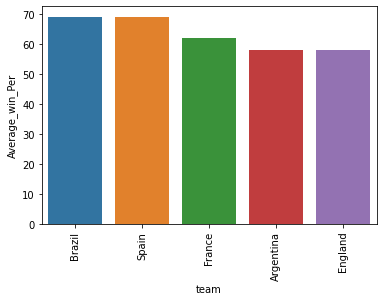

In [156]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_win = fifa_rank_top10.sort_values('Away_win_Per',ascending=False)[0:5]
fifa_rank_win

fifa_rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Average_win_Per'] = round((fifa_rank_top10['Home_win_Per'] + fifa_rank_top10['Away_win_Per'])/2)
fifa_rank_win = fifa_rank_top10.sort_values('Average_win_Per',ascending=False)[0:5]

sns.barplot(data=fifa_rank_win,x='team',y='Average_win_Per')
plt.xticks(rotation=90);


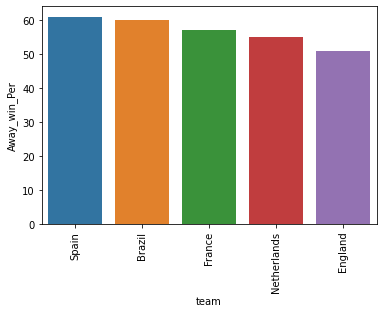

In [155]:
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_win_outside = fifa_rank_top10.sort_values('Away_win_Per',ascending=False)[0:5]
del fifa_rank_win_outside['Home_win_Per'],fifa_rank_win_outside['Average_win_Per']
fifa_rank_win_outside
sns.barplot(data=fifa_rank_win_outside,x='team',y='Away_win_Per')
plt.xticks(rotation=90);


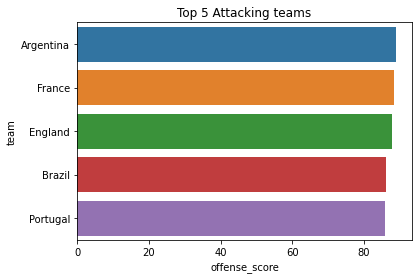

In [162]:
fifa_offense = df[['date', 'home_team', 'away_team','home_team_mean_offense_score','away_team_mean_offense_score']]
home = fifa_offense[['date','home_team','home_team_mean_offense_score']].rename(columns={"home_team":"team","home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date','away_team','away_team_mean_offense_score']].rename(columns={"away_team":"team","away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home,away])
fifa_offense = fifa_offense.sort_values(['date','team'],ascending=[False,True])
fifa_offense_top5 = fifa_offense.groupby('team').first().sort_values('offense_score',ascending=False)[0:5].reset_index()
fifa_offense_top5

sns.barplot(data=fifa_offense_top5,x='offense_score',y='team')
plt.title("Top 5 Attacking teams");


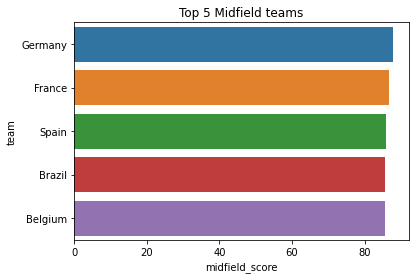

In [161]:
fifa_midfield = df[['date', 'home_team', 'away_team','home_team_mean_midfield_score','away_team_mean_midfield_score']]
home = fifa_midfield[['date','home_team','home_team_mean_midfield_score']].rename(columns={"home_team":"team","home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date','away_team','away_team_mean_midfield_score']].rename(columns={"away_team":"team","away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
fifa_midfield_top5= fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:5].reset_index()
sns.barplot(data=fifa_midfield_top5,x='midfield_score',y='team')
plt.title("Top 5 Midfield teams");

Text(0.5, 1.0, 'Top 5 Defense Teams')

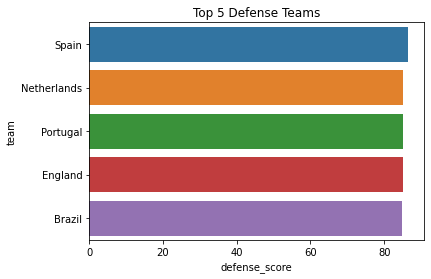

In [160]:
fifa_defense = df[['date', 'home_team', 'away_team','home_team_mean_defense_score','away_team_mean_defense_score']]
home = fifa_defense[['date','home_team','home_team_mean_defense_score']].rename(columns={"home_team":"team","home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date','away_team','away_team_mean_defense_score']].rename(columns={"away_team":"team","away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home,away])
fifa_defense = fifa_defense.sort_values(['date','team'],ascending=[False,True])
fifa_defense_top5 = fifa_defense.groupby('team').first().sort_values('defense_score',ascending=False)[0:5].reset_index()
fifa_defense_top5

sns.barplot(data=fifa_defense_top5,x='defense_score',y='team')
plt.title("Top 5 Defense Teams")